In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import sections
from scipy import stats
import pprint

In [2]:
# sample a triangular distribution
# params: c (relative position of mode, c=0.5 is symmetric), 
#         loc (lower bound), 
#         scale (width)

# lower, mode, upper
GEO_RANGE = {
    'c2': {
        'h':  (70, 80, 90),
        'tw': (0.8, 1.6, 6),
        'ba': (0, 20, 50),
        'ra': (0.8, 1.6, 12),
        'bf': (0, 20, 50),
        'rf': (0.8, 1.6, 12),    
    },

    'i1': {
        'h':  (70, 80, 90),
        'tw': (0.8, 1.6, 6),
        'ba': (0, 40, 60),
        'ta': (0.8, 1.6, 6),
        'bf': (0, 40, 60),
        'tf': (0.8, 1.6, 6),    
    },
    'l2': {
        'h':  (70, 80, 90),
        'tw': (0.8, 1.6, 6),
        'ba': (0, 40, 80),  # hmm... uniform would make more sense ...
        'ra': (0.8, 3, 12),
    },
    'z3': {
        'h':  (70, 80, 90),
        'tw': (0.8, 1.6, 4),
        'ba': (0, 20, 50),
        'ra': (0.8, 1.6, 12),
        'bf': (0, 20, 50),
        'rf': (0.8, 1.6, 12),    
        'blf': (0, 10, 30),
        'rlf': (0.8, 1.6, 12),    
    },
    'z5': {
        'h':  (40, 60, 80),
        'tw': (0.8, 1.6, 4),
        'ba': (0, 20, 30),
        'ra': (1.6, 1.6, 4),
        'ta': (1.6, 1.6, 4),
        'bf': (0, 20, 30),
        'rf': (1.6, 1.6, 4),    
        'tf': (1.6, 1.6, 4),    
    },
    'z8': {
        'h':  (40, 60, 80),
        'tw': (1, 2, 6),
        'ba': (20, 40, 60),
        'ta': (1, 2, 8),
        'ra': (1, 2, 8),
        'rf': (5, 20, 30),    
    },
    'z9': {
        'h':  (70, 80, 90),
        'tw': (0.8, 1.6, 6),
        'ba': (0, 20, 50),
        'ta': (0.8, 1.6, 6),
        'ra': (0.8, 1.6, 10),
        'bf': (0, 20, 50),
        'tf': (0.8, 1.6, 6),    
        'rf': (0.8, 1.6, 10),    
        'blf': (0, 10, 30),
        'tlf': (0.8, 1.6, 6),    
        'rlf': (0.8, 1.6, 10),    
    },
}

def range_to_triang_params(lower, mode, upper):
    """Return c, loc, scale for triangular distribution -> scipy.stats.triang"""
    loc = lower
    scale = upper - loc
    c = (mode - loc) / scale
    return (c, loc, scale)

In [9]:
# pure random sampling
# TODO: use random_state
def sample_triang(section_class, geo_distribution_params, n):
    param_names = section_class.parameter_names
    assert set(param_names) == set(geo_distribution_params.keys()), 'geo param names do not match'
    found = set()
    while len(found) < n:
        sample = []
        for k in param_names:
            v = stats.triang.rvs(*geo_distribution_params[k])
            sample.append(v)
        try: 
            sec = section_class(*sample)
            sqr_area = math.sqrt(sec.area())
            # dimensions scaled by sqrt(area) 
            values = tuple([x/sqr_area for x in sample])
            found.add(values)
        except ValueError:
            pass

    return pd.DataFrame(list(found), columns=param_names)


In [ ]:
TYPES_ANS_CLASSES = {
    'c2': sections.SectionC2, 
    'i1': sections.SectionI1, 
    'l2': sections.SectionL2, 
    'z3': sections.SectionZ3, 
    'z5': sections.SectionZ5, 
    'z8': sections.SectionZ8, 
    'z9': sections.SectionZ9,
}

## try out one section type

In [10]:
sectype = 'c2'
n = 1000


geo_dist_params = {k: range_to_triang_params(*v) for k, v in GEO_RANGE[sectype].items()}
pprint.pprint(geo_dist_params)
klass = TYPES_ANS_CLASSES[sectype]
df = sample_triang(klass, geo_dist_params, n)
df.head()

{'ba': (0.4, 0, 50),
 'bf': (0.4, 0, 50),
 'h': (0.5, 70, 20),
 'ra': (0.07142857142857144, 0.8, 11.2),
 'rf': (0.07142857142857144, 0.8, 11.2),
 'tw': (0.15384615384615385, 0.8, 5.2)}


,h,tw,ba,ra,bf,rf
0,4.473946,0.127196,1.504631,0.246131,2.353695,0.120756
1,5.374715,0.115543,2.430091,0.333170,1.325665,0.110733
2,3.045862,0.188248,1.885107,0.128538,0.940538,0.101545
3,4.026754,0.193651,0.834441,0.069291,0.921833,0.267264
4,5.417211,0.112565,2.072842,0.488147,2.036704,0.355224


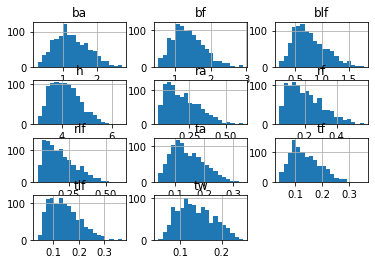

In [167]:
df.hist(bins=20);

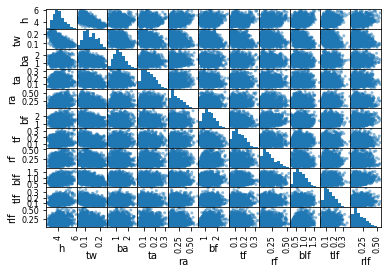

In [146]:
pd.plotting.scatter_matrix(df);

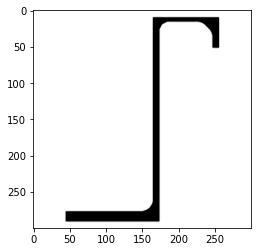

In [168]:
s = klass(*df.iloc[28].values)
#f = s.to_figure()
plt.imshow(s.to_image());

## do all

In [12]:
import os
if not os.path.exists("data"):
    os.mkdir("data")

In [14]:
n = 10000

for sectype, klass in TYPES_ANS_CLASSES.items():
    geo_dist_params = {k: range_to_triang_params(*v) for k, v in GEO_RANGE[sectype].items()}
    df = sample_triang(klass, geo_dist_params, n)
    print(sectype)
    df.to_csv("data/{}_tria.csv".format(sectype), index=True)

c2
i1
l2
z3
z5
z8
z9
